In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
## loading the data
df = pd.read_csv('/diabetes.csv')

In [3]:
## printing the first 5 rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
## shape of the data
df.shape

(768, 9)

In [5]:
# 5 pointer summary
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
## basic info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [9]:
x = df.drop(columns=['Outcome'])
y = df['Outcome']

In [10]:
scaler = StandardScaler()

In [11]:
x_std = scaler.fit_transform(x)

In [12]:
x_std

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x_std,y,test_size = 0.2 , stratify=y , random_state=0)

In [14]:
model = svm.SVC(kernel='linear')

In [15]:
model.fit(x_train,y_train)

SVC(kernel='linear')

In [16]:
## accuracy score on the training data
pred_train = model.predict(x_train)
accuracy_score(pred_train,y_train)

0.7801302931596091

In [17]:
## accuracy score on the test data
pred_test = model.predict(x_test)
accuracy_score(pred_test,y_test)

0.7792207792207793

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [21]:
# loading the data
df = pd.read_csv('/diabetes.csv')

In [22]:
# printing the first 5 rows
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [23]:
# shape of the data
print(df.shape)

(768, 9)


In [24]:
# 5 pointer summary
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [25]:
# basic info about data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [26]:
# Class distribution
print(df['Outcome'].value_counts())

0    500
1    268
Name: Outcome, dtype: int64


In [27]:
# Grouped means
print(df.groupby('Outcome').mean())

         Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  109.980000      68.184000      19.664000   68.792000   
1           4.865672  141.257463      70.824627      22.164179  100.335821   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.304200                  0.429734  31.190000  
1        35.142537                  0.550500  37.067164  


In [28]:
# separating the dependent and independent features
x = df.drop(columns=['Outcome'])
y = df['Outcome']

scaler = StandardScaler()
x_std = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.2, stratify=y, random_state=0)

model = SVC(kernel='linear')
model.fit(x_train, y_train)

SVC(kernel='linear')

In [29]:
# accuracy score before evaluation
pred_train_before = model.predict(x_train)
train_accuracy_before = accuracy_score(pred_train_before, y_train)
print("Training Accuracy (Before Evaluation):", train_accuracy_before)

pred_test_before = model.predict(x_test)
test_accuracy_before = accuracy_score(pred_test_before, y_test)
print("Test Accuracy (Before Evaluation):", test_accuracy_before)

Training Accuracy (Before Evaluation): 0.7801302931596091
Test Accuracy (Before Evaluation): 0.7792207792207793


In [30]:
# accuracy score on the training data
pred_train = model.predict(x_train)
train_accuracy = accuracy_score(pred_train, y_train)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.7801302931596091


In [31]:
# accuracy score on the test data
pred_test = model.predict(x_test)
test_accuracy = accuracy_score(pred_test, y_test)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.7792207792207793


In [32]:
# F1-score on the test data
f1 = f1_score(y_test, pred_test)
print("F1 Score:", f1)

F1 Score: 0.6458333333333334


In [33]:
# Confusion matrix
conf_mat = confusion_matrix(y_test, pred_test)
print("Confusion Matrix:")
print(conf_mat)

Confusion Matrix:
[[89 11]
 [23 31]]


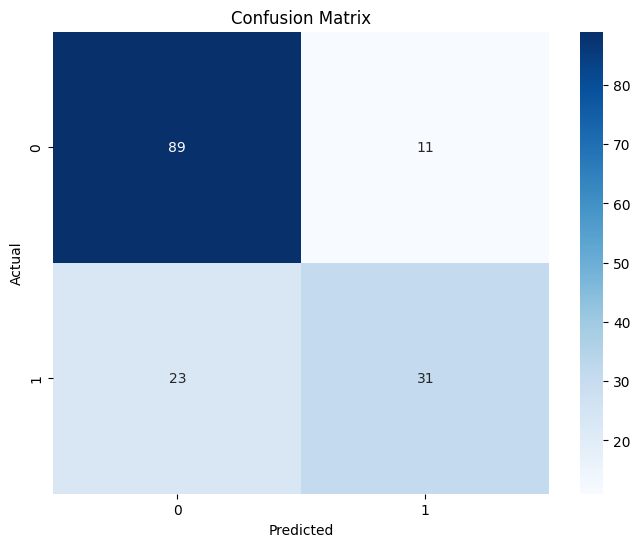

In [34]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()